# Test script for image_files_to_dataset_strategy

## Imports

In [2]:
import os
from data_to_hf.image_files_to_dataset_strategy import UnprocessedHcsImageLabelDirToDatasetStrategy, ProcessedHcsImageLabelDirToDatasetStrategy
from PIL import Image

## User Acceptance Tests

### UnprocessedHcsImageLabelDirToDatasetStrategy

#### Looking for empty labels using create_dict_with_multiple_images_with_move_boxes_and_labels

##### Give

In [5]:
path_to_image_dir = "data/raw_data/unprocessed_hcs_data/images"
path_to_label_file = "data/raw_data/unprocessed_hcs_data/training_tags.txt"

strategy = UnprocessedHcsImageLabelDirToDatasetStrategy()

##### When

In [6]:
res = strategy.create_dict_with_multiple_images_with_move_boxes_and_labels(path_to_image_dir, path_to_label_file)
scoresheets_contain_empty_moves = []
i = 0

for top_item_key, top_item_values in res.items(): # get all values from the full image
    if len(top_item_values) == 0:
        scoresheets_contain_empty_moves.insert(i, top_item_key)
        i+=1
    for move_box, move_label in top_item_values.items(): # get all values from the move boxes
        if " " == move_label or "" == move_label:
            scoresheets_contain_empty_moves.insert(i, top_item_key)
            i+=1
            break

2025-04-29 19:01:42,609 - src.data_to_hf.image_files_to_dataset_strategy - INFO - Creating a dictionary inside a dictionary for main images and the sub image with the corresponding label.With the path to the images: ./data/raw_data/unprocessed_hcs_data/images and the ground truth file: ./data/raw_data/unprocessed_hcs_data/training_tags.txt


##### Then

In [7]:
print(f"Länge: {len(res)}")

Länge: 211


In [8]:
print(f"Daten:\n{res}")

Daten:
{'099_0.png': {'099_0_1_white.png': 'e4', '099_0_1_black.png': 'g6', '099_0_2_white.png': 'Nf3', '099_0_2_black.png': 'Bg7', '099_0_3_white.png': 'd4', '099_0_3_black.png': 'c5', '099_0_4_white.png': 'Nc3', '099_0_4_black.png': 'cxd4', '099_0_5_white.png': 'Nxd4', '099_0_5_black.png': 'Nc6', '099_0_6_white.png': 'Nxc6', '099_0_6_black.png': 'bxc6', '099_0_7_white.png': 'Bc4', '099_0_7_black.png': 'Bxe3', '099_0_8_white.png': 'bxc3', '099_0_8_black.png': 'e6', '099_0_9_white.png': 'O-O', '099_0_9_black.png': 'd5', '099_0_10_white.png': 'exd5', '099_0_10_black.png': 'cxd5', '099_0_11_white.png': 'Bb5+', '099_0_11_black.png': 'Bd7+', '099_0_12_white.png': 'Bxd++', '099_0_12_black.png': 'Bd7', '099_0_13_white.png': 'Qd4', '099_0_13_black.png': 'f6', '099_0_14_white.png': 'Rb1', '099_0_14_black.png': 'e5', '099_0_15_white.png': 'Qh4', '099_0_15_black.png': 'Kf7', '099_0_16_white.png': 'Ba3', '099_0_16_black.png': 'Ne7', '099_0_17_white.png': 'Rb3', '099_0_17_black.png': 'Rac8', '099_

In [9]:
print(f"Länge: {len(scoresheets_contain_empty_moves)}")

Länge: 5


In [10]:
print(f"Daten:\n{scoresheets_contain_empty_moves}")

Daten:
['007_0.png', '061_1.png', '049_1.png', '070_1.png', '048_0.png']


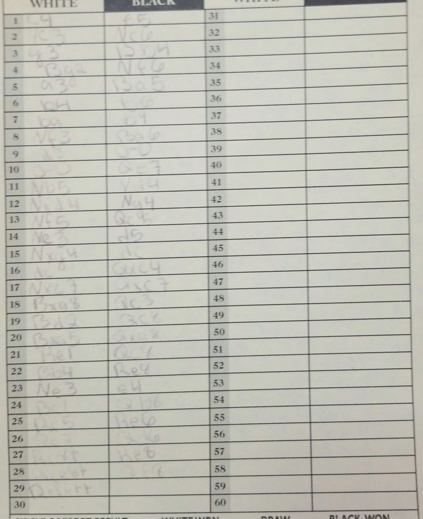

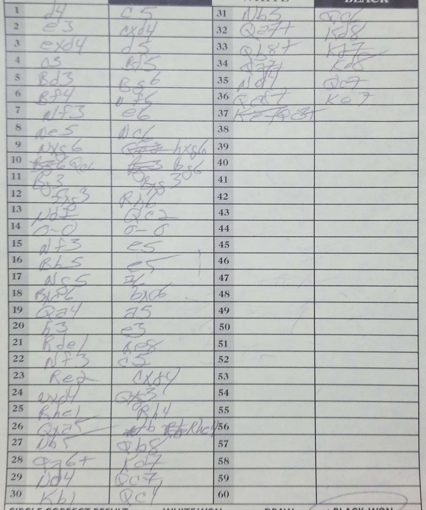

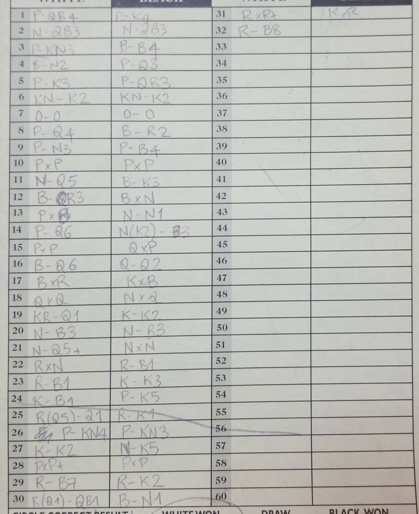

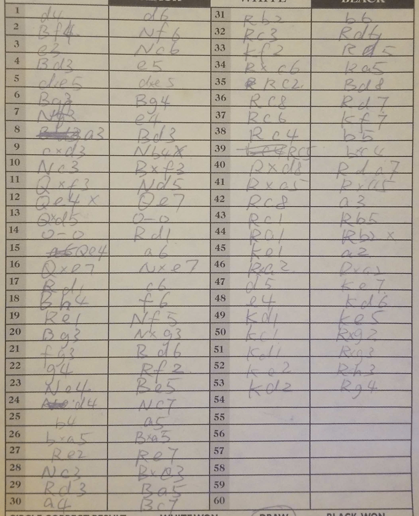

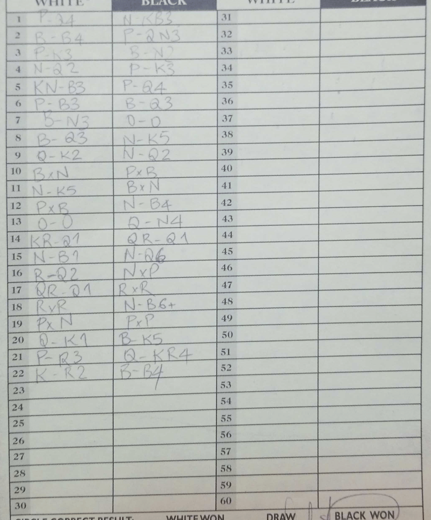

Here you can see the 5 scoresheets where there are empty move labels in data


In [11]:
if len(scoresheets_contain_empty_moves) == 0:
    print("No scoresheet with moves that are empty.")
else:
    for index, img in enumerate(scoresheets_contain_empty_moves):
        image_path = os.path.join(path_to_image_dir, img)
        if os.path.exists(image_path):
            img = Image.open(image_path)
            scale = 0.3
            width = int(img.width * scale)
            height = int(img.height * scale)
            img_resized = img.resize(size=[width, height])
            display(img_resized)
            if index > 3:
                break
        else:
            print(f"Path: {image_path} does not exist")
    if 5 >= len(scoresheets_contain_empty_moves):
        print(f"Here you can see the {len(scoresheets_contain_empty_moves)} scoresheets where there are empty move labels in data")
    else:
        print(f"Here you can see the first 5 of the total of {len(scoresheets_contain_empty_moves)} scoresheets where there are empty move labels in data")

#### test_get_dataset

##### Empty move labels

###### In my data

Give

In [211]:
path_to_image_dir = "data/raw_data/unprocessed_hcs_data/images"
path_to_label_file = "data/raw_data/unprocessed_hcs_data/training_tags.txt"

strategy = UnprocessedHcsImageLabelDirToDatasetStrategy()

When

In [15]:
res_dataset = strategy.get_dataset(path_to_image_dir, path_to_label_file)

scoresheets_contain_empty_moves = []

i = 0

res_dataset_list = res_dataset.to_list()

for img_label in res_dataset_list:
    if len(img_label["labels"]) == 0:
        scoresheets_contain_empty_moves.insert(i, img_label["image"]["path"])
        i+=1
    for move_label in img_label["labels"]:
        if " " == move_label or "" == move_label:
            scoresheets_contain_empty_moves.insert(i, img_label["image"]["path"])
            i+=1
            break


2025-04-29 19:03:02,389 - src.data_to_hf.image_files_to_dataset_strategy - INFO - Creating a dictionary inside a dictionary for main images and the sub image with the corresponding label.With the path to the images: ./data/raw_data/unprocessed_hcs_data/images and the ground truth file: ./data/raw_data/unprocessed_hcs_data/training_tags.txt
2025-04-29 19:03:02,463 - src.data_to_hf.image_files_to_dataset_strategy - INFO - Creating a dataset from a dictionary with the image and the move boxes with the corresponding label.
2025-04-29 19:03:02,997 - src.data_to_hf.image_files_to_dataset_strategy - INFO - Dataset created successfully.


Then

In [16]:
print(res_dataset_list)

[{'image': {'bytes': None, 'path': './data/raw_data/unprocessed_hcs_data/images/099_0.png'}, 'labels': ['e4', 'g6', 'Nf3', 'Bg7', 'd4', 'c5', 'Nc3', 'cxd4', 'Nxd4', 'Nc6', 'Nxc6', 'bxc6', 'Bc4', 'Bxe3', 'bxc3', 'e6', 'O-O', 'd5', 'exd5', 'cxd5', 'Bb5+', 'Bd7+', 'Bxd++', 'Bd7', 'Qd4', 'f6', 'Rb1', 'e5', 'Qh4', 'Kf7', 'Ba3', 'Ne7', 'Rb3', 'Rac8', 'Rfb1', 'Kg7', 'Bxe7', 'Qxe7', 'Rc7', 'h3', 'Rd8', 'Kf1', 'Rdd7', 'Qa6', 'Qc5', 'Qe6', 'Qc4+', 'Kg1', 'Qc6', 'Qe8', 'Rc8']}, {'image': {'bytes': None, 'path': './data/raw_data/unprocessed_hcs_data/images/021_0.png'}, 'labels': ['c4', 'e5', 'Nc3', 'Nf6', 'g3', 'Be7', 'Bg2', 'O-O', 'Nf3', 'd6', 'O-O', 'Bg4', 'Qc2', 'Nc6', 'a3', 'Qd7', 'e3', 'h6', 'b4', 'Bh3', 'Bb2', 'Bxg2', 'Kxg2', 'Ng4', 'Nd5', 'Bf6', 'h3', 'e4', 'Nxf6+', 'Nxf6', 'Nh4', 'Ne5', 'f4', 'exf3+', 'Nxf3', 'Rae8', 'Nxe5', 'de', 'Rf5', 'Qc6+', 'Kh2', 'Qe4', 'Qxe4', 'Nxe4', 'd3', 'Ng5', 'h4', 'g6', 'Rf2', 'Nh7', 'd4', 'e4', 'd5', 'f5', 'Bd4', 'Nf6', 'Bxf6', 'Rxf6', 'a4', 'Kf7', 'b5', 'Ke7

In [18]:
print(scoresheets_contain_empty_moves)

['./data/raw_data/unprocessed_hcs_data/images/007_0.png', './data/raw_data/unprocessed_hcs_data/images/061_1.png', './data/raw_data/unprocessed_hcs_data/images/049_1.png', './data/raw_data/unprocessed_hcs_data/images/070_1.png', './data/raw_data/unprocessed_hcs_data/images/048_0.png']


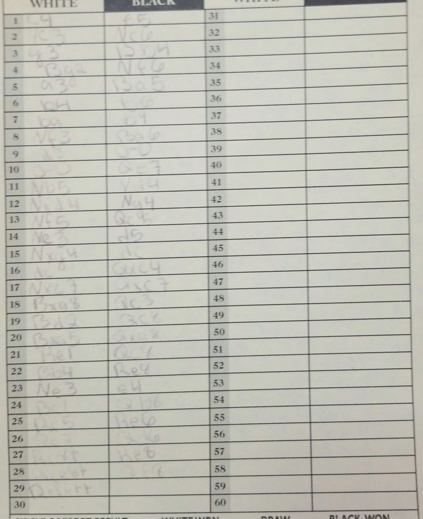

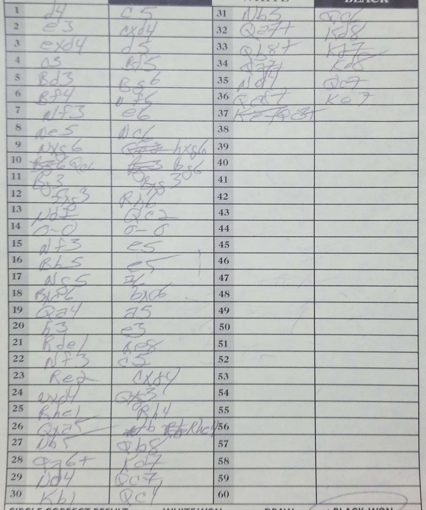

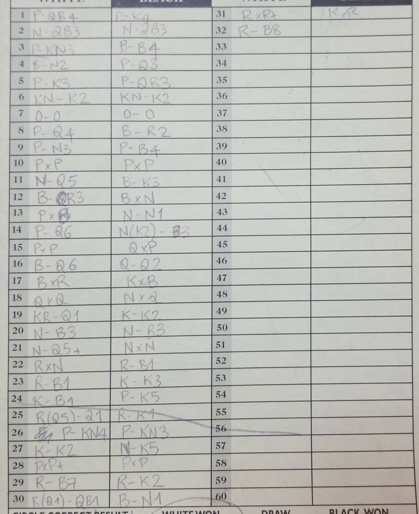

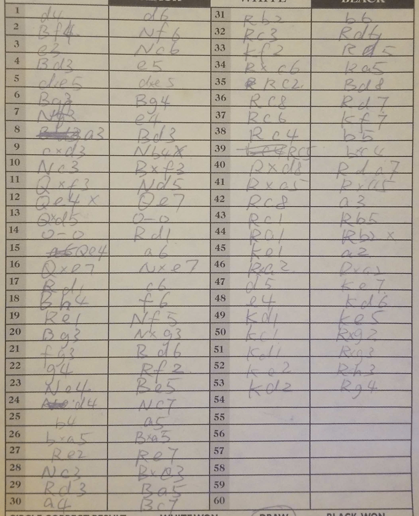

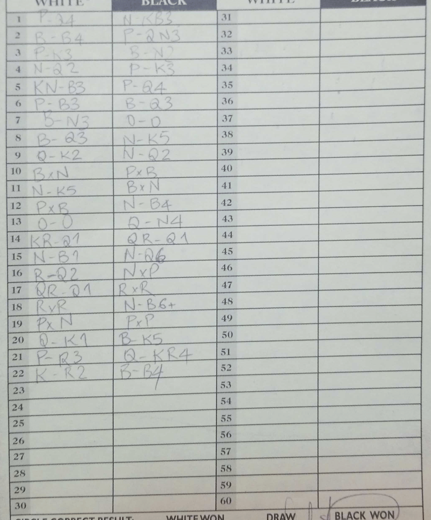

Here you can see the 5 scoresheets where there are empty move labels in data


In [17]:
if len(scoresheets_contain_empty_moves) == 0:
    print("No scoresheet with moves that are empty.")
else:
    for index, image_path in enumerate(scoresheets_contain_empty_moves):
        if os.path.exists(image_path):
            img = Image.open(image_path)
            scale = 0.3
            width = int(img.width * scale)
            height = int(img.height * scale)
            img_resized = img.resize(size=[width, height])
            display(img_resized)

            if index > 3:
                break
        else:
            print(f"Path: {image_path} does not exist")
    if 5 >= len(scoresheets_contain_empty_moves):
        print(f"Here you can see the {len(scoresheets_contain_empty_moves)} scoresheets where there are empty move labels in data")
    else:
        print(f"Here you can see the first 5 of the total of {len(scoresheets_contain_empty_moves)} scoresheets where there are empty move labels in data")

###### On huggingface

When

In [205]:
res_dataset = strategy.get_dataset(path_to_image_dir, path_to_label_file)

res_dataset_list = res_dataset.to_list()

2025-04-29 17:23:07,000 - src.data_to_hf.image_files_to_dataset_strategy - INFO - Creating a dictionary inside a dictionary for main images and the sub image with the corresponding label.With the path to the images: ./data/raw_data/unprocessed_hcs_data/images and the ground truth file: ./data/raw_data/unprocessed_hcs_data/training_tags.txt
2025-04-29 17:23:07,195 - src.data_to_hf.image_files_to_dataset_strategy - INFO - Creating a dataset from a dictionary with the image and the move boxes with the corresponding label.
2025-04-29 17:23:08,103 - src.data_to_hf.image_files_to_dataset_strategy - INFO - Dataset created successfully.


When

In [222]:
for i in range(0, len(res_dataset_list)):
    if "061_1.png" in res_dataset_list[i]["image"]["path"]:
        print(res_dataset_list[i])
        assert len(res_dataset_list[i]["labels"]) == 0

{'image': {'bytes': None, 'path': './data/raw_data/unprocessed_hcs_data/images/061_1.png'}, 'labels': []}


### ProcessedHcsImageLabelDirToDatasetStrategy

#### Looking for empty labels with create_dataset_from_dict_with_img_to_label

##### Give

In [5]:
path_to_image_dir = "data/raw_data/processed_hcs_data/images"
path_to_label_file = "data/raw_data/processed_hcs_data/training_tags.txt"

strategy = ProcessedHcsImageLabelDirToDatasetStrategy()

##### When

In [14]:
res = strategy.ground_truth_dict_image_to_label(path_to_image_dir, path_to_label_file)
scoresheets_contain_empty_moves = []
i = 0

for item_key, item_values in res.items(): # get all values from the move box images
    if " " == item_values or "" == item_values or len(item_values) == 0:
        scoresheets_contain_empty_moves.insert(i, item_values)
        i+=1

2025-04-29 21:02:16,077 - src.data_to_hf.image_files_to_dataset_strategy - INFO - Creating a dictionary inside a dictionary for main images and the sub image with the corresponding label.With the path to the images: ./data/raw_data/processed_hcs_data/images and the ground truth file: ./data/raw_data/processed_hcs_data/training_tags.txt


##### Then

In [15]:
print(len(res))

13669


In [16]:
print(res)

{'001_0_10_black.png': 'Bd6', '001_0_10_white.png': 'Bxc4', '001_0_11_black.png': 'Ng4', '001_0_11_white.png': 'Nb5', '001_0_12_black.png': 'Nf6', '001_0_12_white.png': 'h3', '001_0_13_black.png': 'a6', '001_0_13_white.png': 'Rc1', '001_0_14_black.png': 'cxd6', '001_0_14_white.png': 'Nxd6', '001_0_15_black.png': 'b5', '001_0_15_white.png': 'Re1', '001_0_16_black.png': 'd5', '001_0_16_white.png': 'Bd3', '001_0_17_black.png': 'Rfc8', '001_0_17_white.png': 'Ne5', '001_0_18_black.png': 'Bxc6', '001_0_18_white.png': 'Nxc6', '001_0_19_black.png': 'Ra7', '001_0_19_white.png': 'f3', '001_0_1_black.png': 'Nf6', '001_0_1_white.png': 'd4', '001_0_20_black.png': 'Rac7', '001_0_20_white.png': 'e4', '001_0_21_black.png': 'Nd7', '001_0_21_white.png': 'e5', '001_0_22_black.png': 'Qe8', '001_0_22_white.png': 'Bb4', '001_0_23_black.png': 'Rb7', '001_0_23_white.png': 'Bd7', '001_0_24_black.png': 'Nb6', '001_0_24_white.png': 'Qd2', '001_0_25_black.png': 'Ra7', '001_0_25_white.png': 'b3', '001_0_26_black.p

#### Looking for the correct amount of move_boxes and labels with create_dict_for_image_to_label

##### Give

In [15]:
path_to_image_dir = "data/raw_data/processed_hcs_data/images"
path_to_label_file = "data/raw_data/processed_hcs_data/training_tags.txt"

strategy = ProcessedHcsImageLabelDirToDatasetStrategy()

In [16]:
label_file = open(path_to_label_file, "r")
label_str = label_file.read()
label_file.close()
label_list = [item for item in label_str.split("\n") if len(item) > 0]

move_boxes = []

for index, item in enumerate(label_list):
    move_boxes.insert(index, item.split(" ")[0])

##### When

In [17]:
res = strategy.create_dict_for_image_to_label(path_to_image_dir, path_to_label_file)

res_keys_set = set(res.keys())
move_boxes_set = set(move_boxes)

move_boxes_not_in_res =  move_boxes_set.difference(res_keys_set)

2025-04-29 23:07:29,031 - src.data_to_hf.image_files_to_dataset_strategy - INFO - Creating a dictionary inside a dictionary for main images and the sub image with the corresponding label.With the path to the images: ./data/raw_data/processed_hcs_data/images and the ground truth file: ./data/raw_data/processed_hcs_data/training_tags.txt


##### Then

In [18]:
print(len(res))

13731


In [19]:
print(len(move_boxes_not_in_res))

79


In [20]:
move_boxes_not_in_res_list = list(move_boxes_not_in_res)
move_boxes_not_in_res_list.sort()
print(move_boxes_not_in_res_list)

['041_2_10_black.png', '041_2_10_white.png', '041_2_11_black.png', '041_2_11_white.png', '041_2_12_black.png', '041_2_12_white.png', '041_2_13_black.png', '041_2_13_white.png', '041_2_14_black.png', '041_2_14_white.png', '041_2_15_black.png', '041_2_15_white.png', '041_2_16_black.png', '041_2_16_white.png', '041_2_17_black.png', '041_2_17_white.png', '041_2_18_black.png', '041_2_18_white.png', '041_2_19_black.png', '041_2_19_white.png', '041_2_1_black.png', '041_2_1_white.png', '041_2_20_black.png', '041_2_20_white.png', '041_2_21_black.png', '041_2_21_white.png', '041_2_22_black.png', '041_2_22_white.png', '041_2_23_black.png', '041_2_23_white.png', '041_2_24_black.png', '041_2_24_white.png', '041_2_25_black.png', '041_2_25_white.png', '041_2_26_black.png', '041_2_26_white.png', '041_2_27_black.png', '041_2_27_white.png', '041_2_28_black.png', '041_2_28_white.png', '041_2_29_black.png', '041_2_29_white.png', '041_2_2_black.png', '041_2_2_white.png', '041_2_30_black.png', '041_2_30_whi